Recognition of green apples imaged from the top.

 - Conversion to HSV
 - Erosion + dilation
 - Connected components

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
import os
import sys
from matplotlib import pyplot as plt

In [3]:
import os
import sys

LIBRARY_DIRS = [
    os.path.abspath('..'),
    os.path.abspath('../libraries/visionfuncs')
]

for lib_dir in LIBRARY_DIRS:

    if lib_dir not in sys.path:
        sys.path.append(lib_dir)

In [4]:
from visionfuncs import io
from visionfuncs import improc
from visionfuncs import corners
from visionfuncs import regions
from visionfuncs import viz

## Helper functions

In [5]:
def imshow(im, **kwargs):
    plt.imshow(im, **kwargs)
    plt.axis('off')
    plt.show()


def show_channels(im, channel_names=None, colormap='gray'):

    plt.figure(figsize=(15, 4))

    for ch in range(3):

        plt.subplot(1, 3, ch+1)
        plt.imshow(im[:, :, ch], cmap=colormap, vmin=0, vmax=255)
        plt.axis('off')
        
        title = 'Channel {}'.format(ch+1)
        if channel_names is not None:
            title += ' ({})'.format(channel_names[ch])
        
        plt.title(title)

## Open image

In [6]:
im_apples = io.open_image('images/apples.jpg', cv2.IMREAD_COLOR, cv2.COLOR_BGR2RGB)

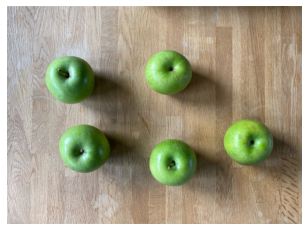

In [7]:
imshow(im_apples)

## Explore image channels

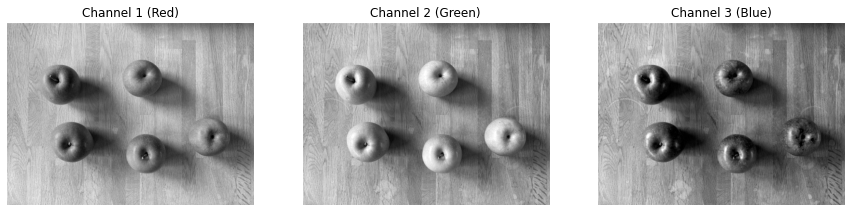

In [8]:
show_channels(im_apples, channel_names=['Red', 'Green', 'Blue'])

## Thresholding using green channel

In [9]:
im_apples_green = im_apples[:, :, 1] # 0 - red, 1 - green, 2 - blue

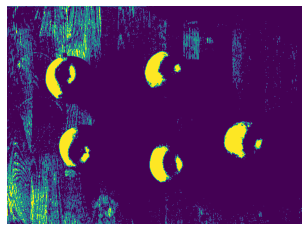

In [10]:
green_mask_from_rgb = regions.threshold_binary(im_apples_green, 200)

imshow(green_mask_from_rgb)

## Converting to HSV color space

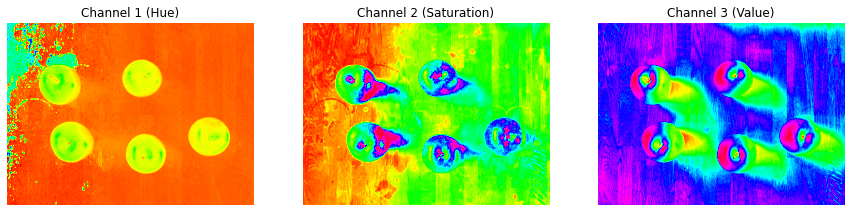

In [11]:
im_hsv = cv2.cvtColor(im_apples, cv2.COLOR_RGB2HSV)

show_channels(im_hsv, channel_names=['Hue', 'Saturation', 'Value'], colormap='hsv')

## Thresholding using the hue channel

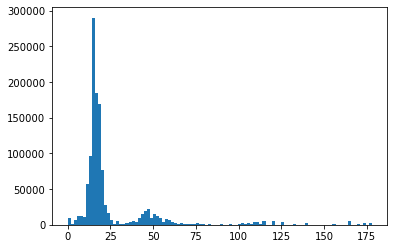

In [12]:
plt.hist(im_hsv[:, :, 0].ravel(), bins=100)
plt.show()

In [13]:
green_mask_from_hsv = regions.mask_threshold_range(im_hsv[:, :, 0], 35, 75)

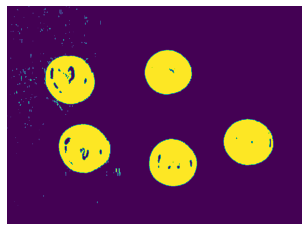

In [14]:
imshow(green_mask_from_hsv)

## Erosion and dilation

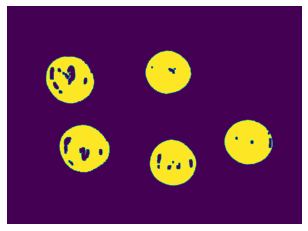

In [15]:
im_eroded = improc.erode(green_mask_from_hsv, kernel_size=7)

imshow(im_eroded)

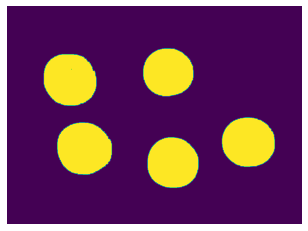

In [16]:
im_dilated = improc.dilate(im_eroded, kernel_size=11, n_iter=2)

imshow(im_dilated)

## Applying binary mask

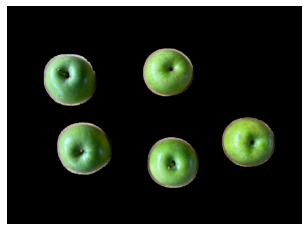

In [17]:
im_masked = regions.apply_mask(im_apples, im_dilated)

imshow(im_masked)

## Detecting connected components

In [18]:
ccomp_labels, ccomp_stats = regions.find_ccomp(im_dilated)

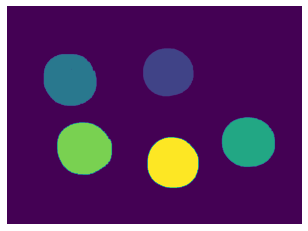

In [19]:
imshow(ccomp_labels)

In [20]:
ccomp_stats

,left,top,width,height,area,x,y
0,0,0,1280,945,1010438,646.417844,466.133621
1,591,184,218,207,36252,698.560079,287.269392
2,160,209,228,223,41583,272.387274,318.982589
3,933,483,229,214,39451,1047.226788,589.971712
4,218,505,237,226,42758,334.045535,617.311240
5,610,569,221,219,39118,719.001585,679.578838


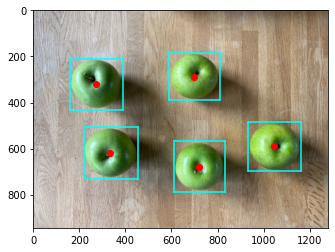

In [21]:
plt.imshow(im_apples)

# plot centroids
plt.scatter(ccomp_stats.iloc[1:].x, ccomp_stats.iloc[1:].y, color='red')

# plot bounding boxes
# skip first row
for idx in ccomp_stats.index[1:]:
    
    row = ccomp_stats.iloc[idx]
    
    viz.plot_bbox(row.left, row.top, row.width, row.height)
    
plt.show()